In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import linregress


In [6]:
#import filtered csv files
melb_data = Path('Outputs/Melbourne_refined_listings_cleaned.csv')
melb_df = pd.read_csv(melb_data)

# Read in the data.
melb_df.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distances_from_cbd,distances_from_cbd_km,distances_from_cbd_category,Price Categories
0,572431386115618941,446636199,2022-02-24,"St Kilda, Australia",within an hour,95%,99%,f,t,t,...,3.97,8,0,4,4,1.21,7434.0,7.434,less than 10km,less than $200
1,727686708237430703,382295537,2020-12-30,"Melbourne, Australia",within a few hours,89%,57%,f,t,t,...,4.20,3,0,3,0,0.81,10140.0,10.140,less than 15km,less than $100
2,1051913801382467131,22860147,2014-10-22,"Melbourne, Australia",within an hour,100%,99%,f,t,t,...,4.00,105,105,0,0,0.98,1451.0,1.451,less than 5km,less than $200
3,1106234039745058155,16365362,2014-06-04,"Melbourne, Australia",within an hour,100%,100%,f,t,t,...,5.00,1,0,1,0,1.00,24913.0,24.913,less than 25km,less than $200
4,1053974246558615906,551937839,2023-12-21,"Point Cook, Australia",within an hour,97%,94%,f,t,t,...,5.00,7,7,0,0,2.00,6951.0,6.951,less than 10km,less than $300


In [7]:
#Refining columns to be related to price and reviews
melb_price_review_df = melb_df[["id", "price", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"]]

melb_price_review_df.head()

,id,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,572431386115618941,123.0,4.2,4.27,4.0,4.6,4.43,4.37,3.97,1.21
1,727686708237430703,50.0,4.2,4.20,4.2,4.2,4.20,4.20,4.20,0.81
2,1051913801382467131,166.0,4.5,4.50,5.0,5.0,5.00,4.50,4.00,0.98
3,1106234039745058155,120.0,5.0,5.00,5.0,5.0,5.00,5.00,5.00,1.00
4,1053974246558615906,202.0,4.5,5.00,4.0,3.5,4.00,4.00,5.00,2.00


In [8]:
# Mean, median, mode for Price
price_mean = round(melb_price_review_df["price"].astype("float").mean(), 2)
price_median = round(melb_price_review_df["price"].astype("float").median(), 2)
price_mode = round(melb_price_review_df["price"].astype("float").mode(), 2)

print(f"Price Mean: {price_mean}")
print(f"Price Median: {price_median}")
print(f"Price mode: {price_mode}")

Price Mean: 252.05
Price Median: 200.0
Price mode: 0    200.0
Name: price, dtype: float64


In [9]:
# Mean, median, mode for Review Scores Rating
review_scores_rating_mean = round(melb_price_review_df["review_scores_rating"].astype("float").mean(), 2)
review_scores_rating_median = round(melb_price_review_df["review_scores_rating"].astype("float").median(), 2)
review_scores_rating_mode = round(melb_price_review_df["review_scores_rating"].astype("float").mode(), 2)

print(f"Review Scores Rating Mean: {review_scores_rating_mean}")
print(f"Review Scores Rating Median: {review_scores_rating_median}")
print(f"Review Scores Rating mode: {review_scores_rating_mode}")

Review Scores Rating Mean: 4.73
Review Scores Rating Median: 4.85
Review Scores Rating mode: 0    5.0
Name: review_scores_rating, dtype: float64


In [10]:
# Mean, median, mode for Reviews Per Month
reviews_per_month_mean = round(melb_price_review_df["reviews_per_month"].astype("float").mean(), 2)
reviews_per_month_median = round(melb_price_review_df["reviews_per_month"].astype("float").median(), 2)
reviews_per_month_mode = round(melb_price_review_df["reviews_per_month"].astype("float").mode(), 2)

print(f"Reviews Per Month Mean: {reviews_per_month_mean}")
print(f"Reviews Per Month Median: {reviews_per_month_median}")
print(f"Reviews Per Month mode: {reviews_per_month_mode}")

Reviews Per Month Mean: 1.8
Reviews Per Month Median: 1.38
Reviews Per Month mode: 0    1.0
Name: reviews_per_month, dtype: float64


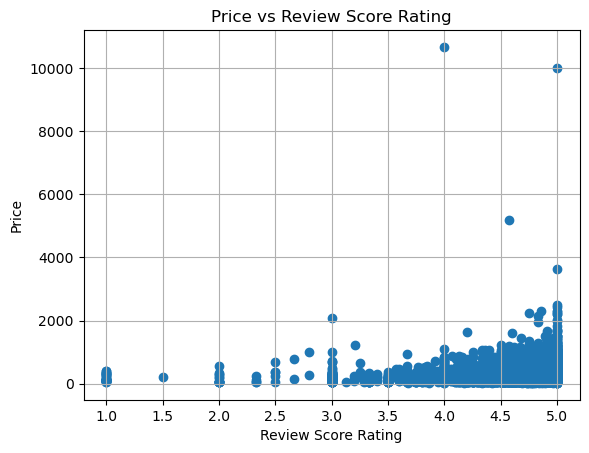

In [11]:
price = melb_price_review_df["price"]
review_score = melb_price_review_df["review_scores_rating"]

plt.scatter(review_score, price, marker="o")

plt.grid()
plt.xlabel("Review Score Rating")
plt.ylabel("Price")
plt.title("Price vs Review Score Rating")

plt.show()

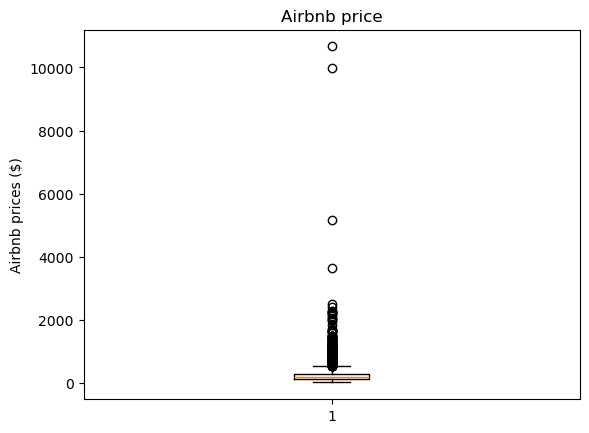

In [12]:
# Create boxplot to see if any outliers in price data
fig1, ax1 =plt.subplots()
ax1.set_title('Airbnb price')
ax1.set_ylabel('Airbnb prices ($)')
ax1.boxplot(price)
plt.show()

In [13]:
# Identify the upper and lower bounds of the data using the quartiles and interquartile range
quartiles = price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 130.0
The upper quartile of temperatures is: 300.5
The interquartile range of temperatures is: 170.5
The the median of temperatures is: 200.0 
Values below -125.75 could be outliers.
Values above 556.25 could be outliers.


In [14]:
#Create filtered dataframe that only has values within the upper and lower bound (lower bound can be ignored as it is below 0)
melb_outliers_removed_df = melb_price_review_df.loc[melb_price_review_df["price"] <= upper_bound]


Price vs Review Scores:  
Hypothesis: If the price of Airbnb properties are related to the review score of that property, then as the price of the property increases, so will the review scores of those properties.

Null Hypothesis: As the price of airbnb properties increase, no improvement will be observed in the review scores of those properties.

Alternative Hypothesis: As the price of airbnb properties increases, the review scores of those properties will increase.

the r^2 value is: 0.0016585146011254984
p value is: 5.408380363184123e-05


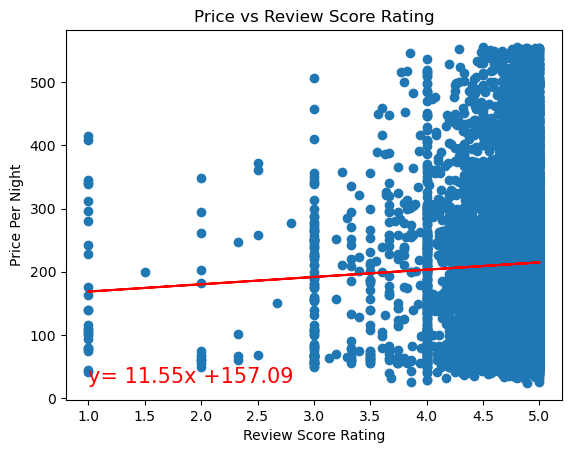

In [15]:
#conduct linear regression of price vs review score rating

x_values = melb_outliers_removed_df["review_scores_rating"]
y_values = melb_outliers_removed_df["price"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.plot(x_values, slope * x_values + intercept, color = 'red')
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.xlabel("Review Score Rating")
plt.ylabel("Price Per Night")
plt.title("Price vs Review Score Rating")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")

plt.savefig("Outputs/PriceVsReviewRating.png")

print(f"the r^2 value is: {rvalue**2}")
print(f"p value is: {pvalue}")

Price vs Review Scores Results:

The linear regression is modelling the review score rating of an airbnb against the price of that property. It identified that there is a very weak positive correlation between the two variables as the r^2 value for both is only just below 0.05. The p-value for this regression is quite small (5.41x10^-5) which suggests that the null hypothesis is rejected in favour of the alternative hypothesis.   

Price vs Reviews Per Month:  

Hypothesis: If the price of Airbnb properties are related to the rate of reviews per month of that property, then as the price of the property increases, so will the reviews per month of those properties.

Null Hypothesis: As the price of airbnb properties increase, no improvement will be observed in the reviews per month of those properties.

Alternative Hypothesis: As the price of airbnb properties increases, the reviews per month of those properties will increase.

the r^2 value is: 4.044064934482132e-06
p value is: 0.842047142754122


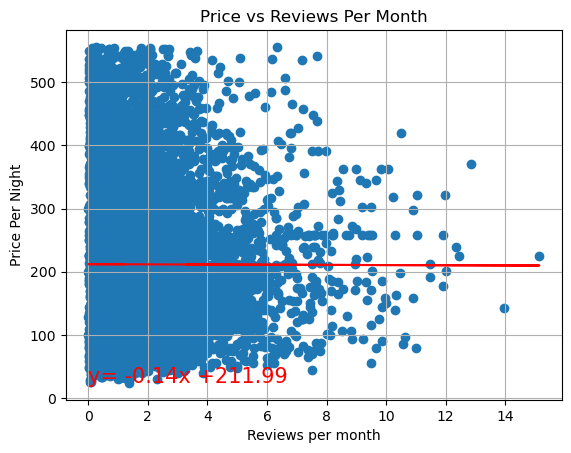

In [16]:
#conduct linear regression of price vs reviews per month
y_values = melb_outliers_removed_df["price"]
x_values = melb_outliers_removed_df["reviews_per_month"]


plt.grid()
plt.xlabel("Reviews per month")
plt.ylabel("Price Per Night")
plt.title("Price vs Reviews Per Month")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.plot(x_values, slope * x_values + intercept, color = 'red')
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")
print(f"the r^2 value is: {rvalue**2}")
print(f"p value is: {pvalue}")
plt.show()

Price vs Reviews Per Month:

The linear regression is modelling reviews of an airbnb per month against the price of that property. It identified that there is an extremely weak negative correlation between the two variables as the r^2 value for both is only just above 0. The p-value for this regression is large (0.84) which suggests that the null hypothesis cannot be rejected in favour of the alternative hypothesis. This suggests that nay differences or effects are likely due to random variation.  

Review Score Rating vs Reviews Per Month:  

Hypothesis: If the review score of Airbnb properties are related to the rate of reviews per month of that property, then as the review rate increases, so will the review scores of those properties.

Null Hypothesis: As the review rate per month of airbnb properties increase, no improvement will be observed in the review scores of those properties.

Alternative Hypothesis: As the review rate per month of airbnb properties increases, the review scores of those properties will increase.

the r^2 value is: 0.027482738395374632
p value is: 2.086918417767622e-65


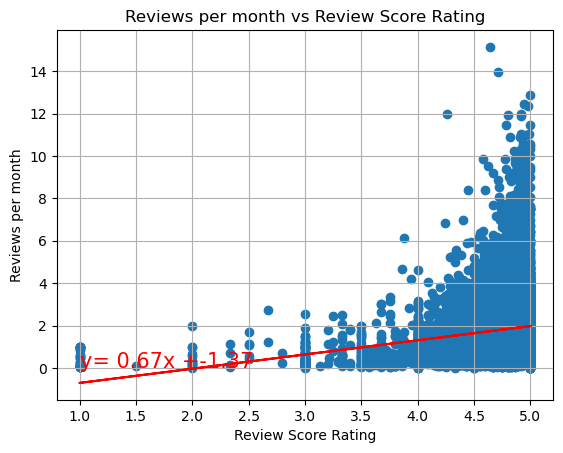

In [17]:
#conduct linear regression of review score rating vs reviews per month
Reviews_per_month = melb_price_review_df["reviews_per_month"]
review_score = melb_price_review_df["review_scores_rating"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(review_score, Reviews_per_month)

plt.scatter(review_score, Reviews_per_month)
plt.plot(review_score, slope * review_score + intercept, color = 'red')
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq, (review_score.min(), Reviews_per_month.min()), fontsize=15, color="red")
plt.grid()
plt.xlabel("Review Score Rating")
plt.ylabel("Reviews per month")
plt.title("Reviews per month vs Review Score Rating")

print(f"the r^2 value is: {rvalue**2}")
print(f"p value is: {pvalue}")

plt.show()

Reviews Per Month vs Review Score Rating:

The linear regression is modelling reviews of an airbnb per month against the review score rating of that property. It identified that there is a very weak positive correlation between the two variables as the r^2 value for both is below 0.05. The p-value for this regression is very small (2.08x10^-65) which suggests that the null hypothesis is rejected in favour of the alternative hypothesis. 
